In [ ]:
!pip freeze 

In [ ]:
pip install fastai --upgrade

In [ ]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 12.9MB/s 
     |████████████████████████████████| 51kB 7.9MB/s 
     |████████████████████████████████| 1.1MB 40.1MB/s 
     |████████████████████████████████| 51kB 8.4MB/s 
     |████████████████████████████████| 40kB 6.8MB/s 
     |████████████████████████████████| 92kB 12.8MB/s 
     |████████████████████████████████| 61kB 9.9MB/s 
     |████████████████████████████████| 51kB 8.6MB/s 
     |████████████████████████████████| 2.6MB 52.7MB/s 
Mounted at /content/gdrive


In [ ]:
from fastbook import *
from fastai.vision.widgets import *

In [ ]:
from fastai import *
from fastai.vision import *
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
folders = ['Lockheed Martin F-22 Raptor', 'Dassault Rafale', 'Panavia Tornado', 'Mikoyan-Gurevich MiG-25', 'Mikoyan MiG-29']
files = ['f22.txt', 'dassault rafale.txt', 'panavia tornado.txt', 'mig25.txt', 'mig29.txt']
path = Path('/content/drive/My Drive/dataset/fighter')

In [ ]:
path.ls()

(#10) [Path('/content/drive/My Drive/dataset/fighter/dassault rafale.txt'),Path('/content/drive/My Drive/dataset/fighter/f22.txt'),Path('/content/drive/My Drive/dataset/fighter/mig25.txt'),Path('/content/drive/My Drive/dataset/fighter/mig29.txt'),Path('/content/drive/My Drive/dataset/fighter/panavia tornado.txt'),Path('/content/drive/My Drive/dataset/fighter/Lockheed Martin F-22 Raptor'),Path('/content/drive/My Drive/dataset/fighter/Dassault Rafale'),Path('/content/drive/My Drive/dataset/fighter/Panavia Tornado'),Path('/content/drive/My Drive/dataset/fighter/Mikoyan-Gurevich MiG-25'),Path('/content/drive/My Drive/dataset/fighter/Mikoyan MiG-29')]

In [ ]:
path_test = Path('/content/drive/My Drive/dataset/test')

In [ ]:
classes = ['Lockheed Martin F-22 Raptor', 'Dassault Rafale', 'Panavia Tornado', 'Mikoyan-Gurevich MiG-25', 'Mikoyan MiG-29']

In [ ]:
fns = get_image_files(path)
fns

(#1036) [Path('/content/drive/My Drive/dataset/fighter/Lockheed Martin F-22 Raptor/00000003.jpg'),Path('/content/drive/My Drive/dataset/fighter/Lockheed Martin F-22 Raptor/00000002.jpg'),Path('/content/drive/My Drive/dataset/fighter/Lockheed Martin F-22 Raptor/00000000.jpg'),Path('/content/drive/My Drive/dataset/fighter/Lockheed Martin F-22 Raptor/00000005.jpg'),Path('/content/drive/My Drive/dataset/fighter/Lockheed Martin F-22 Raptor/00000007.jpg'),Path('/content/drive/My Drive/dataset/fighter/Lockheed Martin F-22 Raptor/00000008.jpg'),Path('/content/drive/My Drive/dataset/fighter/Lockheed Martin F-22 Raptor/00000001.jpg'),Path('/content/drive/My Drive/dataset/fighter/Lockheed Martin F-22 Raptor/00000004.jpg'),Path('/content/drive/My Drive/dataset/fighter/Lockheed Martin F-22 Raptor/00000006.jpg'),Path('/content/drive/My Drive/dataset/fighter/Lockheed Martin F-22 Raptor/00000009.jpg')...]

In [ ]:
failed = verify_images(fns)
failed

(#0) []

In [ ]:
failed.map(Path.unlink);

In [ ]:
jets = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [ ]:
dls = jets.dataloaders(path)

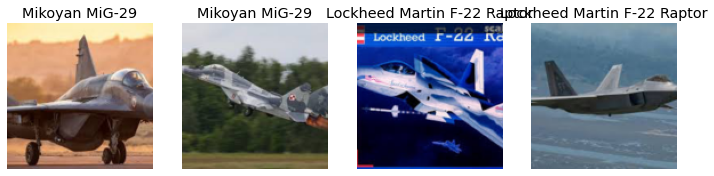

In [ ]:
dls.valid.show_batch(max_n=4, nrows=1)

In [ ]:
jets = jets.new(item_tfms=RandomResizedCrop(224, min_scale=0.5),batch_tfms=aug_transforms())
dls = jets.dataloaders(path)

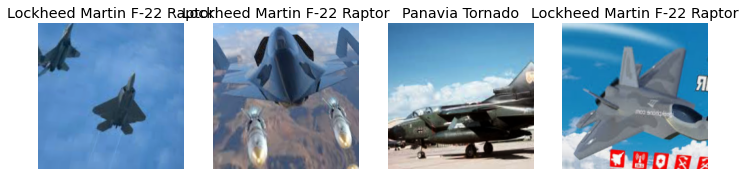

In [ ]:
dls.train.show_batch(max_n=4, nrows=1)

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,error_rate,time
0,2.382771,1.527260,0.487923,00:05


epoch,train_loss,valid_loss,error_rate,time
0,1.677847,1.240958,0.415459,00:07
1,1.415410,1.045319,0.357488,00:07
2,1.145528,1.015952,0.309179,00:07
3,0.955690,0.981178,0.314010,00:07


In [ ]:
learn.save('/content/drive/My Drive/dataset/models/stage-1')

Path('/content/drive/My Drive/dataset/models/stage-1.pth')

In [ ]:
learn.unfreeze()

SuggestedLRs(lr_min=8.317637839354575e-05, lr_steep=1.5848931980144698e-06)

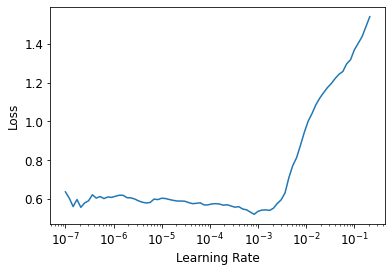

In [ ]:
learn.lr_find()

In [ ]:
learn.load('/content/drive/My Drive/dataset/models/stage-1')

In [ ]:
learn.fine_tune(2, max_lr=slice(3e-5, 3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.679274,1.078855,0.309179,00:06


epoch,train_loss,valid_loss,error_rate,time
0,0.644604,1.016169,0.294686,00:07
1,0.546629,0.970433,0.289855,00:07


In [ ]:
learn.save('/content/drive/My Drive/dataset/models/stage-2')

Path('/content/drive/My Drive/dataset/models/stage-2.pth')

In [ ]:
learn.fine_tune(2, max_lr=slice(3e-5, 3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.403406,0.973472,0.280193,00:06


epoch,train_loss,valid_loss,error_rate,time
0,0.399159,1.128275,0.280193,00:07
1,0.355186,1.046072,0.270531,00:07


In [ ]:
learn.save('/content/drive/My Drive/dataset/models/stage-3')

Path('/content/drive/My Drive/dataset/models/stage-3.pth')

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)


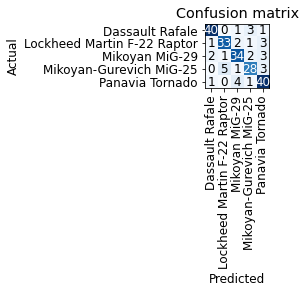

In [ ]:
interp.plot_confusion_matrix()

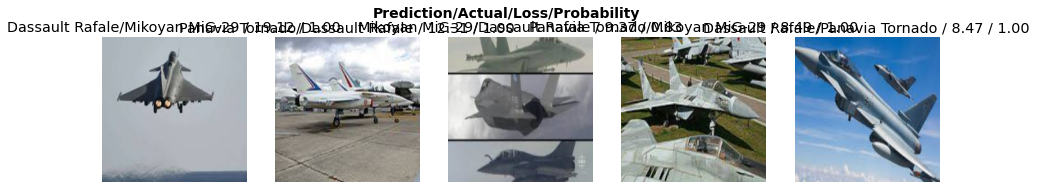

In [ ]:
interp.plot_top_losses(5, nrows=1)

In [ ]:
#image cleaner
#cleaner = ImageClassifierCleaner(learn)
#cleaner

In [ ]:
#hide
#deleting images
# for idx in cleaner.delete(): cleaner.fns[idx].unlink()
# for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [ ]:
learn.load('/content/drive/My Drive/dataset/models/stage-3')

In [ ]:
learn.fine_tune(2, max_lr=slice(3e-5, 3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.226607,0.985914,0.241546,00:06


epoch,train_loss,valid_loss,error_rate,time
0,0.291024,0.966523,0.280193,00:07
1,0.239978,0.946649,0.265700,00:07


In [ ]:
learn.fine_tune(4, max_lr=slice(3e-5, 3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.195856,0.968963,0.256039,00:06


epoch,train_loss,valid_loss,error_rate,time
0,0.193910,0.973342,0.236715,00:07
1,0.196755,0.960834,0.251208,00:07
2,0.208793,0.999899,0.246377,00:07
3,0.184449,0.953552,0.241546,00:07


In [ ]:
learn.save('/content/drive/My Drive/dataset/models/stage-4')

Path('/content/drive/My Drive/dataset/models/stage-4.pth')

In [ ]:
learn.fine_tune(4, max_lr=slice(3e-5, 3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.163100,0.854132,0.202899,00:06


epoch,train_loss,valid_loss,error_rate,time
0,0.144404,0.907470,0.227053,00:07
1,0.139180,1.078621,0.241546,00:07
2,0.129795,0.866829,0.198068,00:07
3,0.119589,0.862623,0.202899,00:07


In [ ]:
learn.save('/content/drive/My Drive/dataset/models/stage-5')

Path('/content/drive/My Drive/dataset/models/stage-5.pth')

In [ ]:
learn.fine_tune(2, max_lr=slice(3e-5, 3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.088906,0.853855,0.207729,00:06


epoch,train_loss,valid_loss,error_rate,time
0,0.089726,1.139575,0.251208,00:07
1,0.093330,0.930874,0.227053,00:07


In [ ]:
learn.fine_tune(2, max_lr=slice(3e-5, 3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.054744,0.893644,0.207729,00:06


epoch,train_loss,valid_loss,error_rate,time
0,0.098272,0.903381,0.222222,00:07
1,0.106661,0.873199,0.183575,00:07


In [ ]:
learn.save('/content/drive/My Drive/dataset/models/stage-6')

Path('/content/drive/My Drive/dataset/models/stage-6.pth')

In [ ]:
learn.load('/content/drive/My Drive/dataset/models/stage-6')

In [ ]:
learn.export('/content/drive/My Drive/dataset/models/export.pkl')

In [ ]:
learn_inf = load_learner('/content/drive/My Drive/dataset/models/export.pkl')

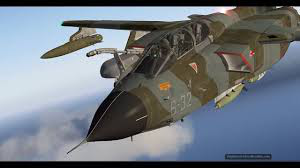

In [ ]:
fnames = get_image_files(path_test/'Panavia Tornado')
img  = Image.open(fnames[0])
img

In [ ]:
learn_inf.predict(fnames[0])

('Panavia Tornado',
 tensor(4),
 tensor([2.6115e-02, 1.1188e-03, 8.3227e-03, 1.3028e-04, 9.6431e-01]))

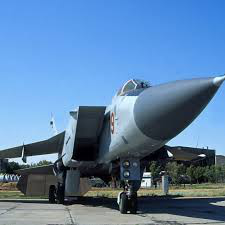

In [ ]:
dest = '/content/drive/My Drive/dataset/test/Mikoyan-Gurevich MiG-25/00000017.jpg'
im = Image.open(dest)
im


In [ ]:
learn_inf.predict(dest)

('Mikoyan-Gurevich MiG-25',
 tensor(3),
 tensor([6.2690e-08, 1.0193e-08, 2.9995e-06, 9.9922e-01, 7.7999e-04]))

In [ ]:
btn_upload = widgets.FileUpload()
btn_upload


FileUpload(value={}, description='Upload')

In [ ]:
img = PILImage.create(btn_upload.data[-1])

In [ ]:
#hide_output
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(224,224))
out_pl

Output()

In [ ]:
pred,pred_idx,probs = learn_inf.predict(img)

In [ ]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: Mikoyan-Gurevich MiG-25; Probability: 0.9898')

In [ ]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [ ]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(224,224))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [ ]:
#hide
#Putting back btn_upload to a widget for next cell
btn_upload = widgets.FileUpload()

In [ ]:
VBox([widgets.Label('Select your plane!'), 
      btn_upload, btn_run, out_pl, lbl_pred])